For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

Use the data to complete the following tasks:

* Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.
* Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
* Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.
* Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.
* Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

## Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.

In [1]:
import pandas as pd
dat = pd.read_csv('fcc-forum-pageviews.csv')
dat.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [2]:
dat["date"] = pd.to_datetime(dat["date"])
dat = dat.set_index('date')
dat.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


## Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [3]:
dat = dat.loc[(dat['value'] > dat['value'].quantile(0.0025)) & (dat['value'] <= dat['value'].quantile(0.975))]
dat.head()

,value
date,
2016-05-12,10539
2016-05-13,6933
2016-05-14,3127
2016-05-15,2927
2016-05-17,3403


## Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. 

<Axes: title={'center': 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'}, xlabel='Date', ylabel='Page Views'>

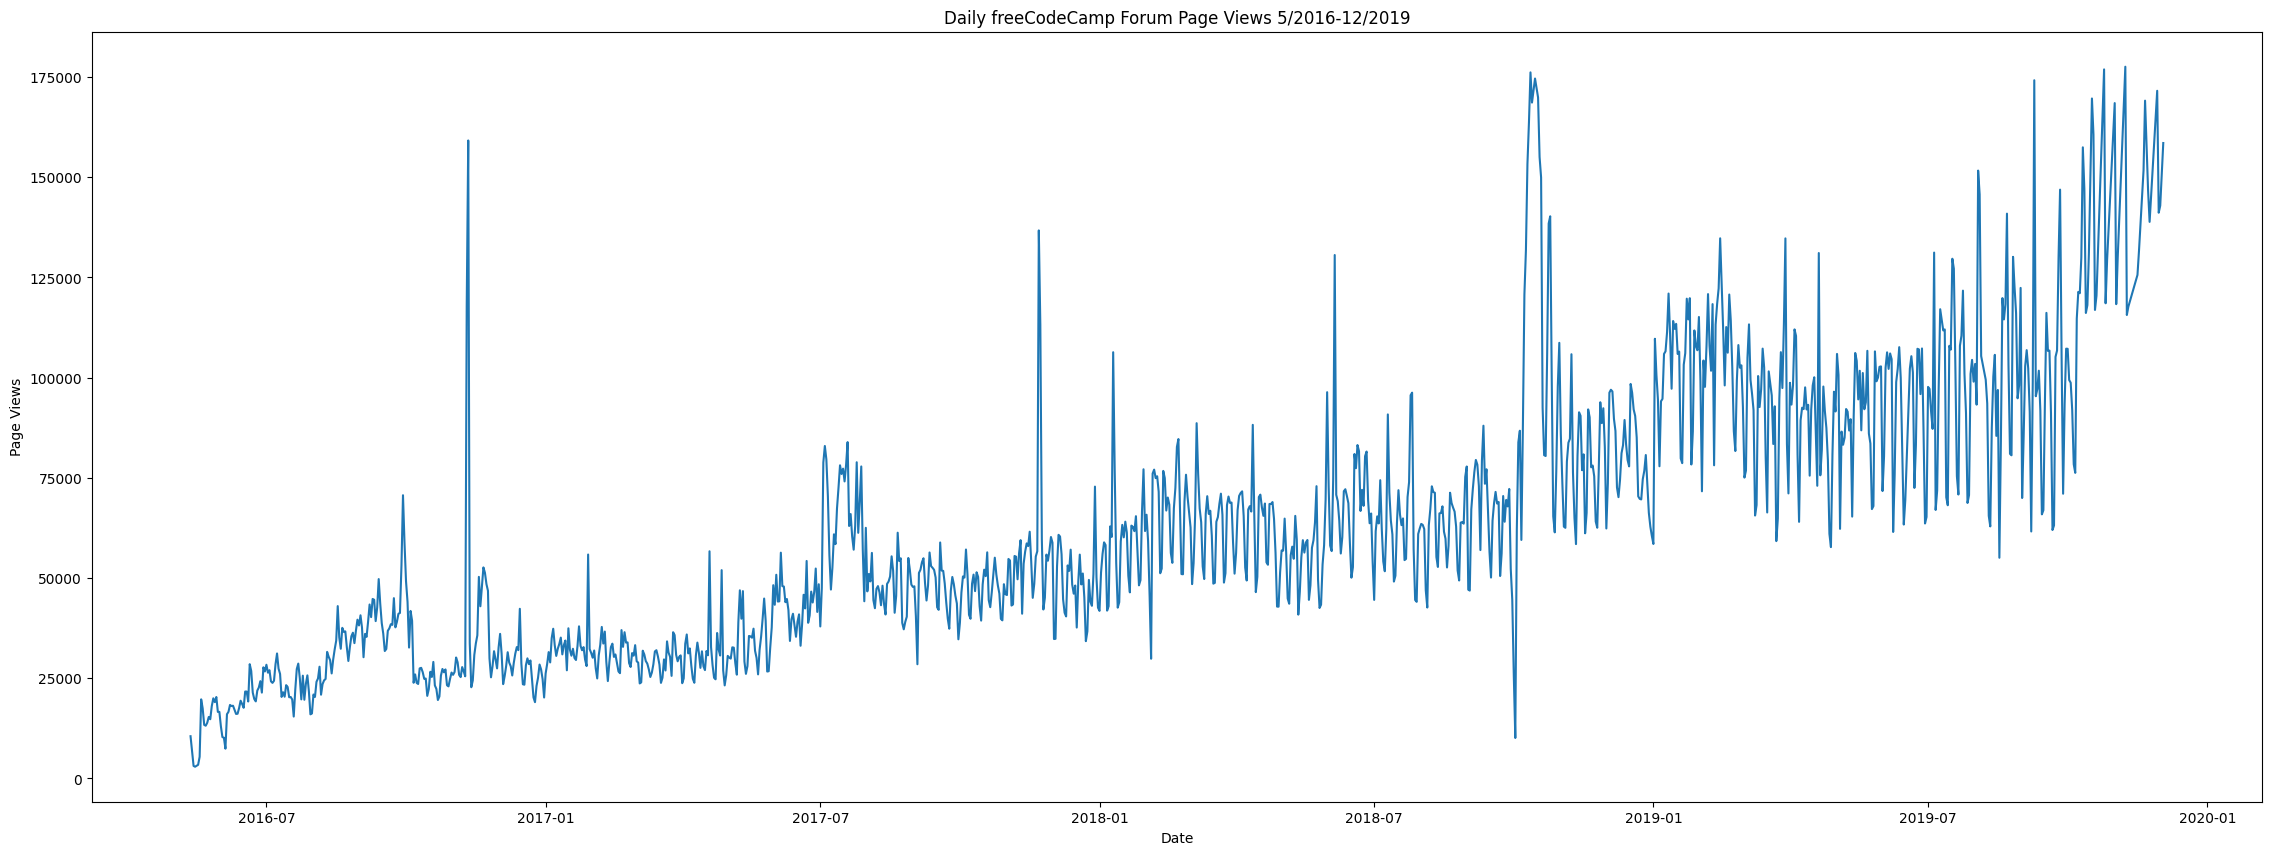

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(28, 10), dpi=100)
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")
sns.lineplot(data=dat, legend=False)

Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

C:\Users\LAPTO\AppData\Local\Temp\ipykernel_22608\4132908832.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='center')


[Text(0, 0, '2016'),
 Text(1, 0, '2017'),
 Text(2, 0, '2018'),
 Text(3, 0, '2019')]

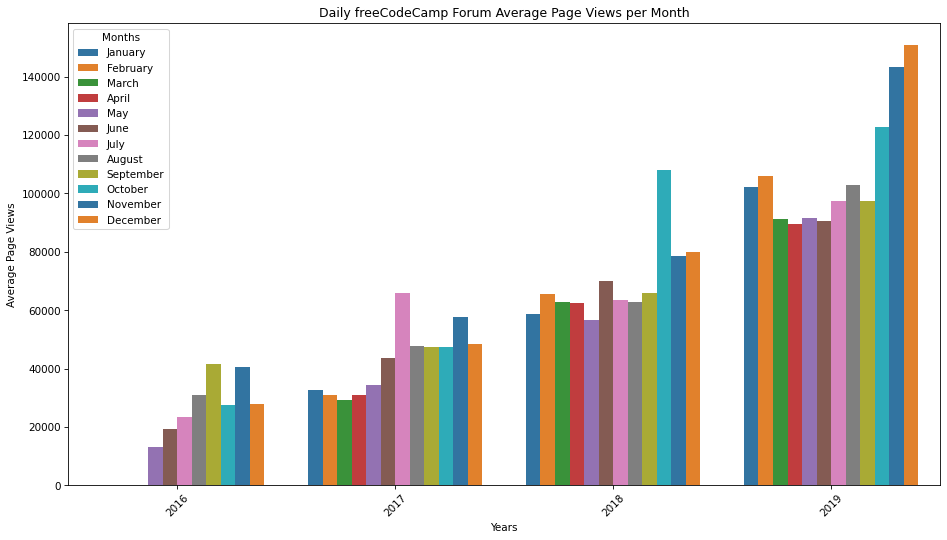

In [11]:
dat_bar = dat.copy()
dat_bar["Years"] = dat_bar.index.year
dat_bar["Months"] = dat_bar.index.month_name()
dat_bar = pd.DataFrame(dat_bar.groupby(["Years", "Months"], sort=False)["value"].mean().round().astype(int))
dat_bar = dat_bar.rename(columns={"value": "Average Page Views"})
dat_bar = dat_bar.reset_index()
missing_data = {"Years": [2016, 2016, 2016, 2016],"Months": ['January', 'February', 'March', 'April'],"Average Page Views": [0, 0, 0, 0]}
dat_bar = pd.concat([pd.DataFrame(missing_data), dat_bar])
fig, ax = plt.subplots(figsize=(15, 8), dpi=75)
ax.set_title("Daily freeCodeCamp Forum Average Page Views per Month")
chart = sns.barplot(data=dat_bar, x="Years", y="Average Page Views", hue="Months", palette="tab10")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='center')

* Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

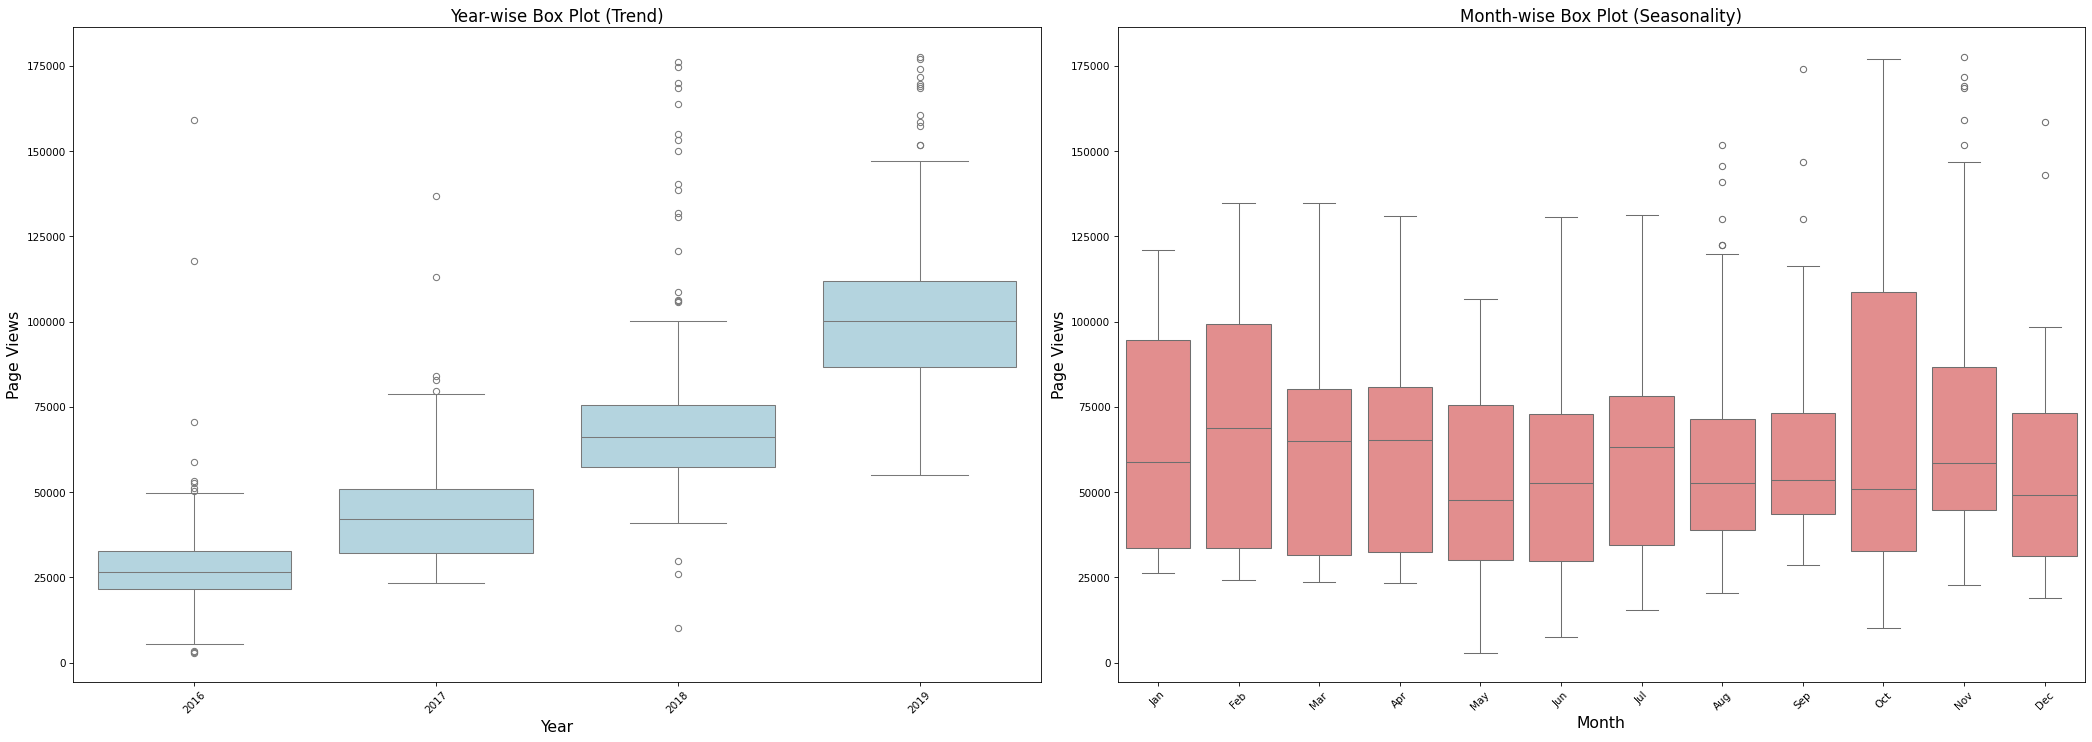

In [15]:
dat_box = dat.copy()
dat_box.reset_index(inplace=True)
dat_box['year'] = [d.year for d in dat_box.date]
dat_box['month'] = [d.strftime('%b') for d in dat_box.date]
fig, axes = plt.subplots(1, 2, figsize=(28, 10), dpi=75)
sns.boxplot(data=dat_box, x="year", y="value", ax=axes[0], color='lightblue')
axes[0].set_title("Year-wise Box Plot (Trend)", fontsize=16)
axes[0].set_xlabel("Year", fontsize=15)
axes[0].set_ylabel("Page Views", fontsize=15)
axes[0].tick_params(axis='x', rotation=45)
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sns.boxplot(data=dat_box, x="month", y="value", order=month_order, ax=axes[1], color='lightcoral')
axes[1].set_title("Month-wise Box Plot (Seasonality)", fontsize=16)
axes[1].set_xlabel("Month", fontsize=15)
axes[1].set_ylabel("Page Views", fontsize=15)
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


- Based on page views by years, we know that page views is increase year by year.<br>
- Based on page views by month, February have the most page views median.